### *1/16

* 图像16分割

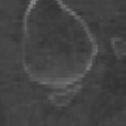

In [2]:
from PIL import Image

# Load the image
image_path = '/home/ec2-user/SeqX2Y_PyTorch/dataset/579/POPI_seq3_2D_579/2DCT-5/70.png'
image = Image.open(image_path)

# Get the dimensions of the image
width, height = image.size

# Calculate the size of each segment (assuming a 4x4 grid)
segment_width = width // 4
segment_height = height // 4

# Create and save each segment
segments = []
for i in range(4):
    for j in range(4):
        left = j * segment_width
        upper = i * segment_height
        right = (j + 1) * segment_width
        lower = (i + 1) * segment_height
        
        # Crop the image
        segment = image.crop((left, upper, right, lower))
        segments.append(segment)

# Display the first segment as a sample
segments[0].show()

* 在图上画16等分线(做ppt)

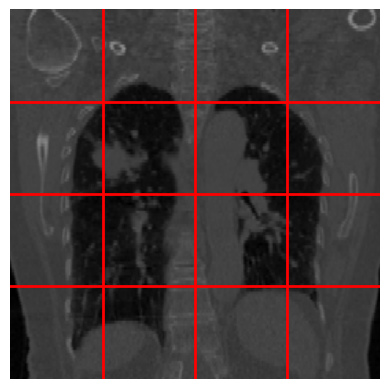

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

# Reload the new image
image_path_new = '/home/ec2-user/SeqX2Y_PyTorch/dataset/579/POPI_seq3_2D_579/2DCT-5/70.png'
image_new = Image.open(image_path_new)

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image_new)

# Get the dimensions of the new image
width_new, height_new = image_new.size

# Draw vertical and horizontal lines to divide the image into 16 equal parts (4x4 grid)
for i in range(1, 4):
    # Vertical lines
    ax.axvline(x=i * (width_new // 4), color='red', linewidth=2)
    # Horizontal lines
    ax.axhline(y=i * (height_new // 4), color='red', linewidth=2)

# Hide the axes
ax.axis('off')

# Show the image with the red lines
plt.show()

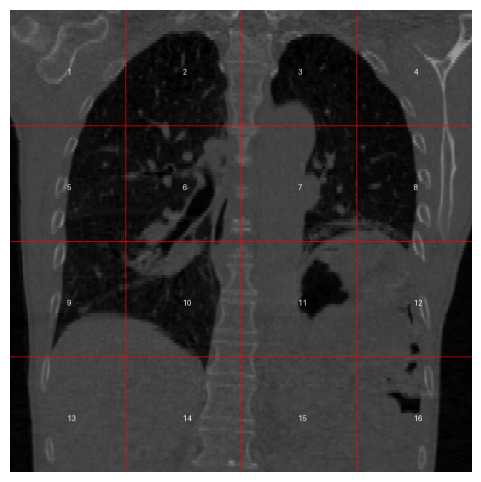

In [1]:
# Import necessary libraries for displaying inline
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# Load the sixth image
sixth_image_path = "/home/ec2-user/SeqX2Y_PyTorch/dataset/579/POPI_seq3_2D_579/2DCT-3/70.png"
image = Image.open(sixth_image_path)

# Get image dimensions (assuming the same 4x4 grid as previous)
width, height = image.size

# Line color and thickness
line_color = "red"
line_thickness = 1

# Font settings (default PIL font)
font = ImageFont.load_default()

# Recalculate the correct cell width and height for equal division
cols, rows = 4, 4
cell_width = width // cols
cell_height = height // rows

# Reopen the image to start fresh
image = Image.open(sixth_image_path)
draw = ImageDraw.Draw(image)

# Draw red dividing lines (vertical and horizontal) to ensure equal division
for col in range(1, cols):
    x = col * cell_width
    draw.line([(x, 0), (x, height)], fill=line_color, width=line_thickness)

for row in range(1, rows):
    y = row * cell_height
    draw.line([(0, y), (width, y)], fill=line_color, width=line_thickness)

# Add the numbers again to the cells
for row in range(rows):
    for col in range(cols):
        x = col * cell_width
        y = row * cell_height
        text_x = x + cell_width // 2
        text_y = y + cell_height // 2
        draw.text((text_x, text_y), str(row * cols + col + 1), font=font, fill="white")

# Display the corrected image with equal divisions and labels
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()

### *16分SSIM

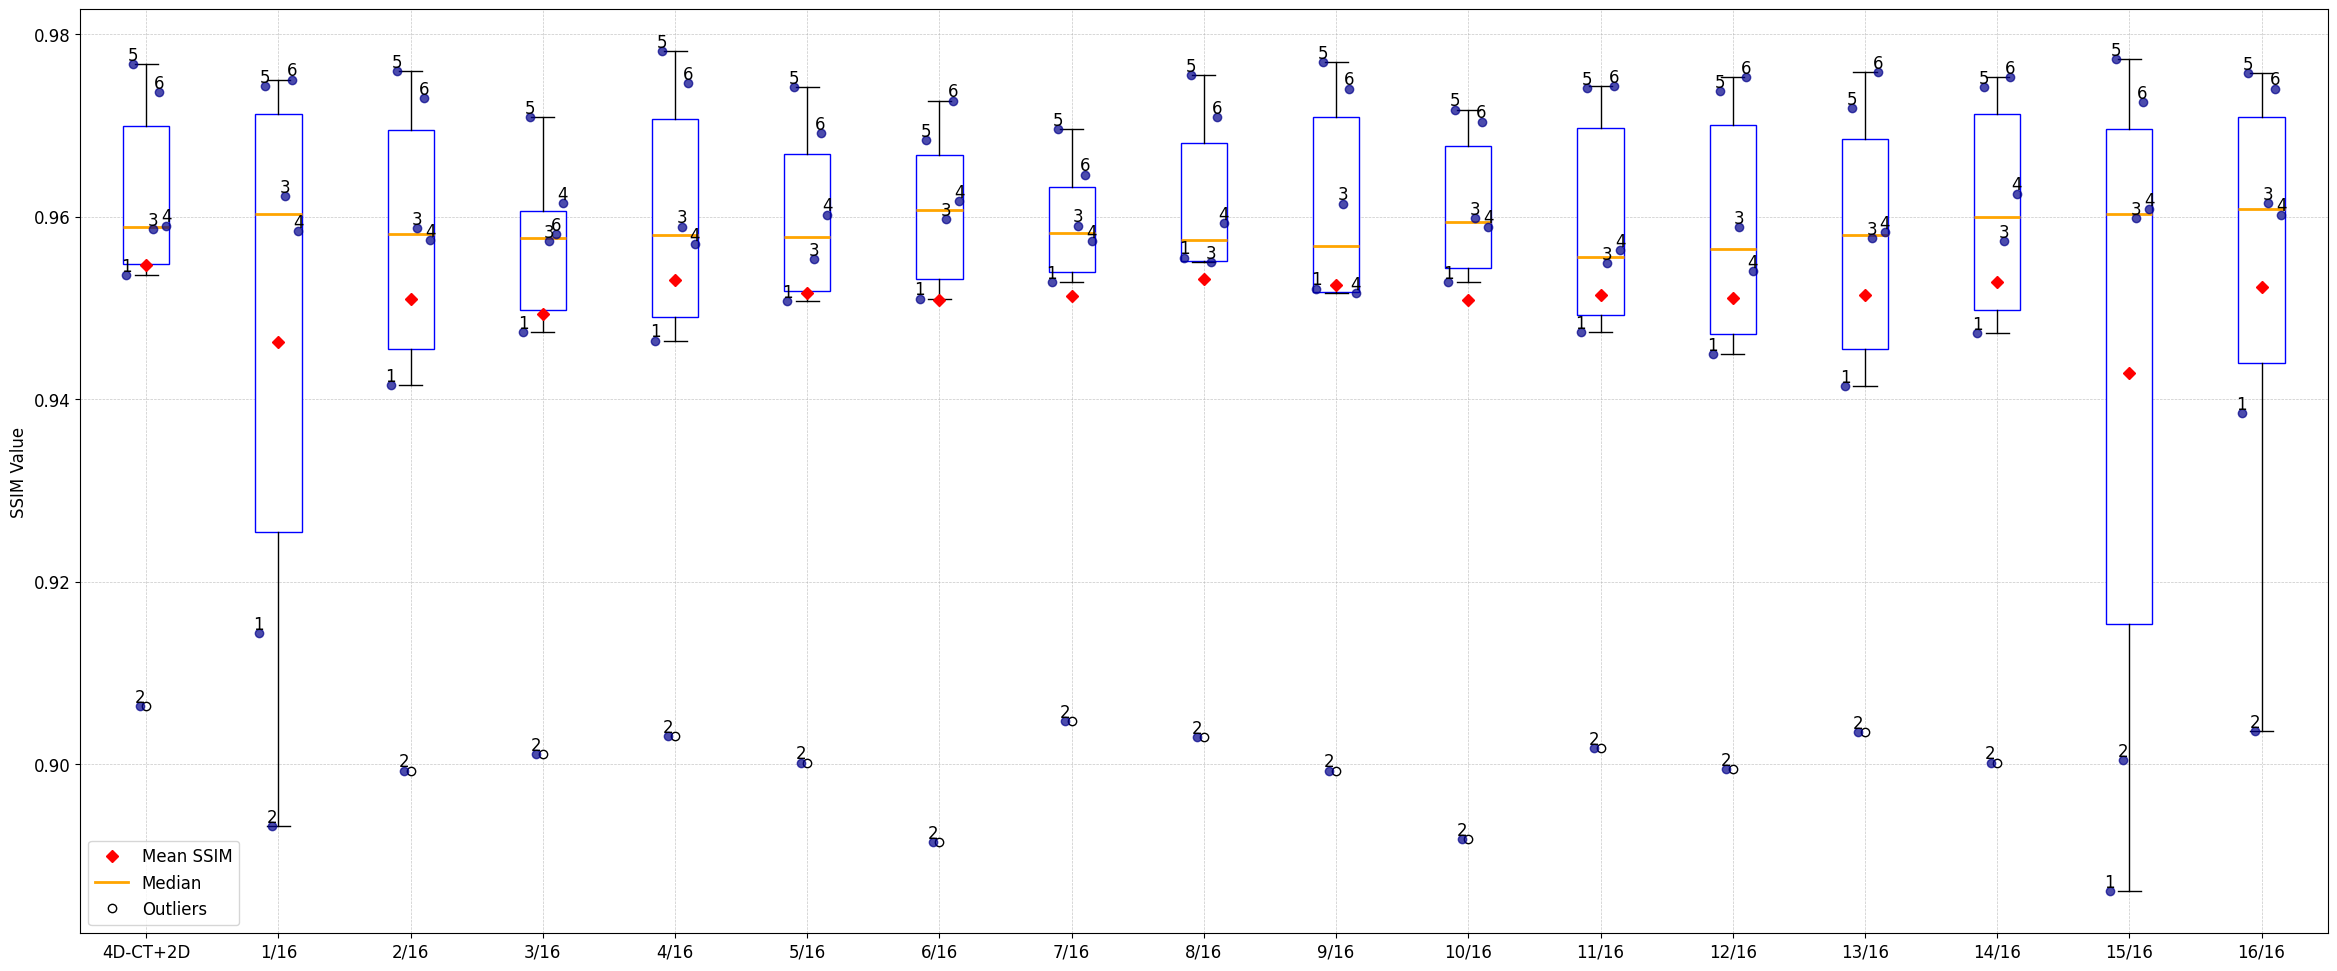

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# First we create a DataFrame from the data provided in the image.
data = {
    # SSIM
    '4D-CT+2D': [0.9536, 0.9064, 0.9586, 0.959, 0.9767, 0.9736], # epoch 200 
    '1/16': [0.9144, 0.8932, 0.9622, 0.9584, 0.9743, 0.975],
    '2/16': [0.9415, 0.8993, 0.9587, 0.9574, 0.9759, 0.973],
    '3/16': [0.9473, 0.9011, 0.9573, 0.9615, 0.9709, 0.9581],
    '4/16': [0.9464, 0.9031, 0.9589, 0.957, 0.9781, 0.9746],
    '5/16': [0.9507, 0.9002, 0.9553, 0.9602, 0.9742, 0.9691],
    '6/16': [0.951, 0.8915, 0.9597, 0.9617, 0.9684, 0.9727],
    '7/16': [0.9528, 0.9047, 0.959, 0.9573, 0.9696, 0.9646],
    '8/16': [0.9555, 0.903, 0.955, 0.9593, 0.9755, 0.9709],
    '9/16': [0.9521, 0.8993, 0.9614, 0.9516, 0.9769, 0.974],
    '10/16': [0.9528, 0.8918, 0.9598, 0.9589, 0.9717, 0.9704],
    '11/16': [0.9473, 0.9018, 0.9549, 0.9563, 0.9741, 0.9743],
    '12/16': [0.9449, 0.8995, 0.9588, 0.954, 0.9737, 0.9753],
    '13/16': [0.9414, 0.9035, 0.9576, 0.9583, 0.9719, 0.9758],
    '14/16': [0.9472, 0.9002, 0.9573, 0.9625, 0.9742, 0.9753],
    '15/16': [0.8861, 0.9005, 0.9598, 0.9608, 0.9772, 0.9725],
    '16/16': [0.9385, 0.9036, 0.9615, 0.9602, 0.9757, 0.974],
    # '4D-CT+2D': [0.9536, 0.9064, 0.9586, 0.959, 0.9767, 0.9736] # epoch 200 
}
df = pd.DataFrame(data)

plt.figure(figsize=(29, 12))
plt.rcParams.update({'font.size': 12})

boxprops = dict(linestyle='-', linewidth=1, color='blue')
meanpointprops = dict(marker='D', markeredgecolor='red', markerfacecolor='red', markersize=6)
# meanpointprops = dict(color="red", linewidth=1)
flierprops = dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=6)

boxplot_elements = plt.boxplot([df[col] for col in df.columns],
                               notch=False, widths=0.35, patch_artist=True, showmeans=True,
                               meanprops=meanpointprops, medianprops=dict(color="orange", linewidth=2),
                            #    meanprops=meanpointprops, medianprops=dict(marker='D', markeredgecolor='orange', markerfacecolor='orange'),
                               boxprops=boxprops, flierprops=flierprops)

for patch in boxplot_elements['boxes']:
    patch.set_facecolor('white')

# # 在盒图上显示每个点
# colors = ['darkred', 'darkblue', 'darkgreen', 'goldenrod', 'purple']  # 不同组使用不同颜色
# for i, col in enumerate(df.columns):
#     y = df[col]
#     x = np.linspace(i+1-0.1, i+1+0.1, num=len(y))  # 使用线性空间为每个数据点生成固定偏移
#     plt.scatter(x, y, alpha=0.7, color=colors[i])

# 使用固定的偏移量，确保每个点都可见
offsets = np.array([-0.15, -0.05, 0.05, 0.15, -0.1, 0.1])  # 为六个数据点定义偏移量
patient_ids = np.arange(1, 7)  # 假设有6个患者编号从1到6
# colors = ['darkred', 'darkblue', 'darkgreen', 'goldenrod', 'purple']
for i, col in enumerate(df.columns):
    y = df[col]
    x = i + 1 + offsets[:len(y)]  # 使用固定的偏移量
    plt.scatter(x, y, alpha=0.7, color='darkblue',zorder=3)
    for xi, yi, patient_id in zip(x, y, patient_ids):
        plt.text(xi, yi, f'{patient_id}', color='black', fontsize=12, ha='center', va= 'bottom')

plt.xticks(range(1, len(df.columns)+1), df.columns)
plt.ylabel('SSIM Value')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.plot([], [], 'D', color='red', label='Mean SSIM')
plt.plot([], [], color='orange', label='Median', linewidth=2)
# plt.plot([], [], color='red', label='Mean SSIM', linewidth=2)
# plt.plot([], [], 'D', color='orange', label='Median')
plt.plot([], [], 'o', markerfacecolor='white', markeredgecolor='black', label='Outliers', markersize=6)
plt.legend()
# Set the y-axis to start from 0
# plt.ylim(0.85,1)
plt.show()

### *16分MAE

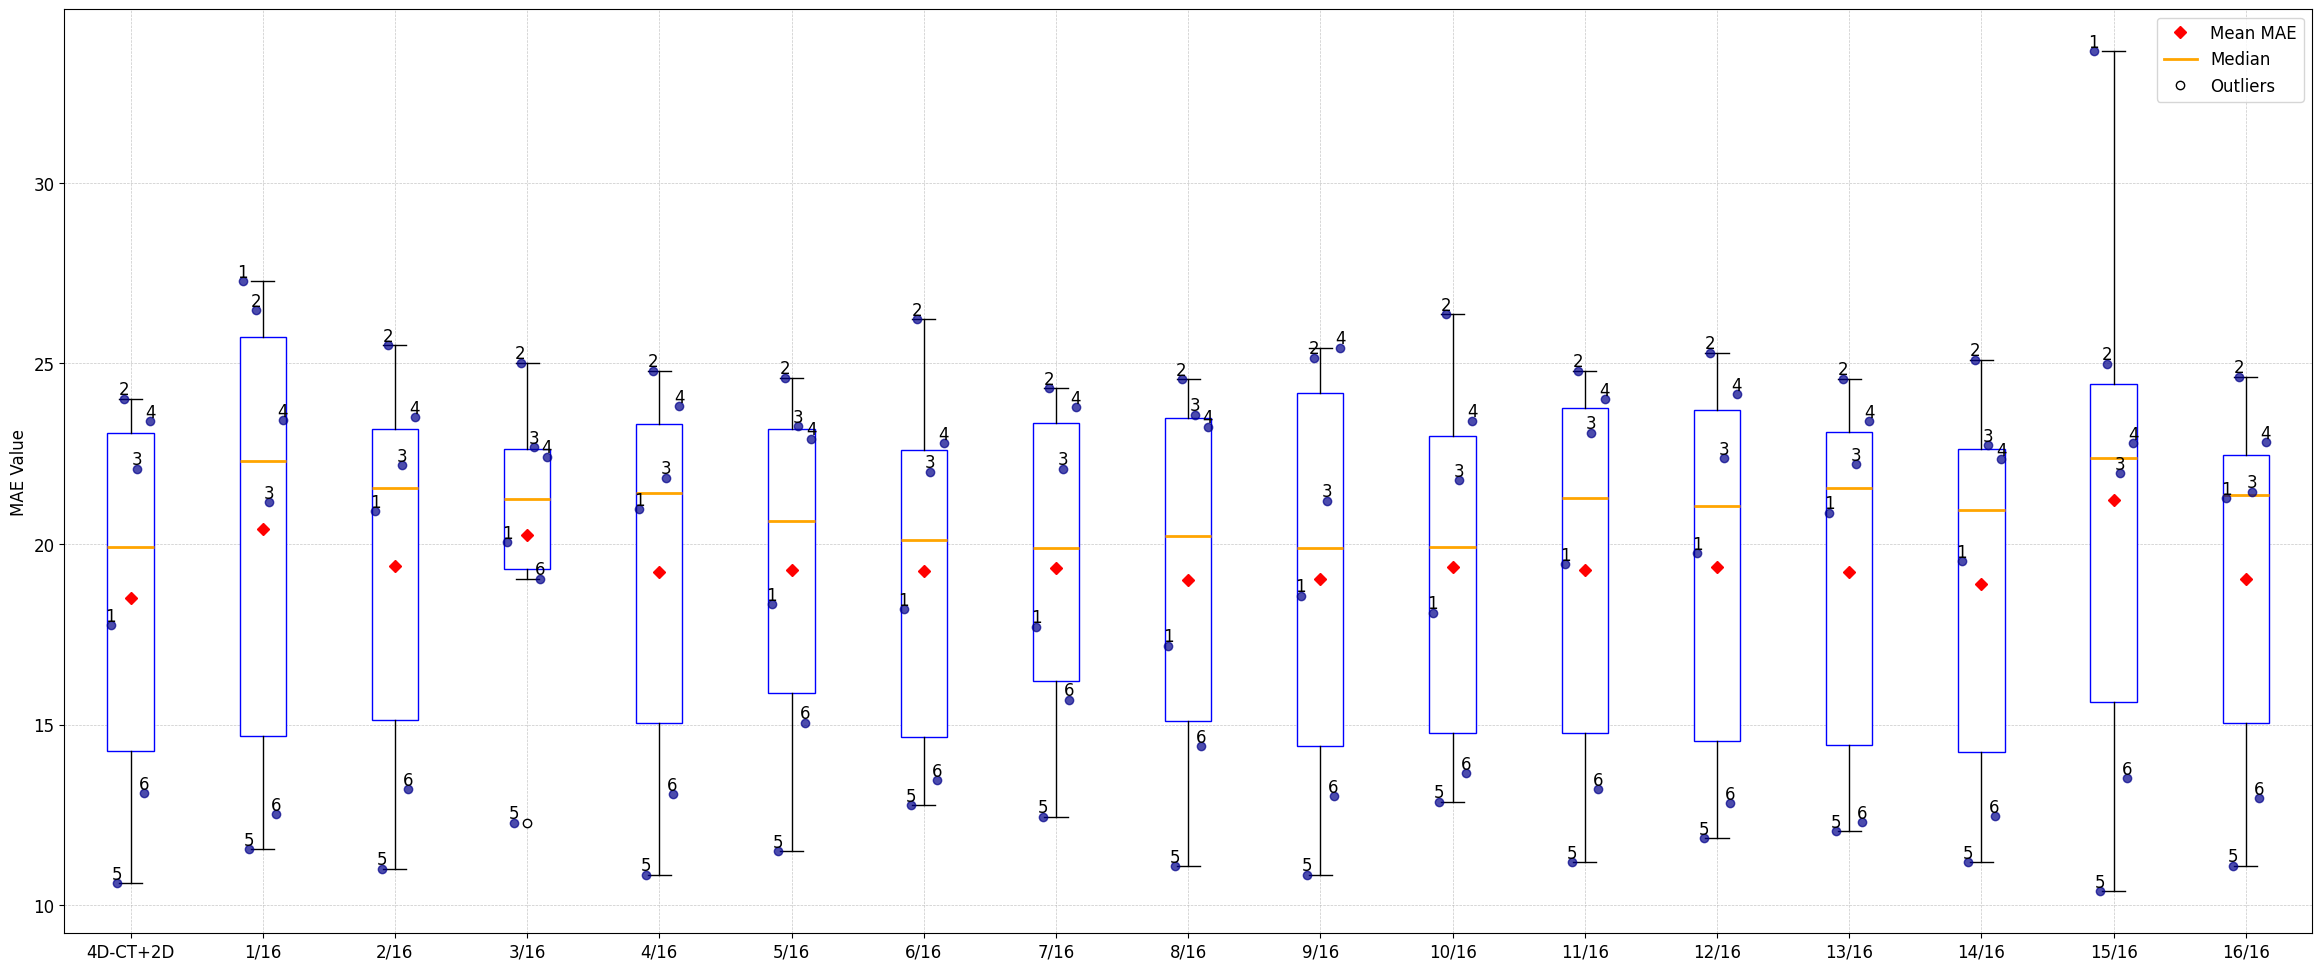

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# First we create a DataFrame from the data provided in the image.
data = {
    # MAE
    '4D-CT+2D': [17.7627, 24.0281, 22.0883, 23.4065, 10.6111, 13.0963], # epoch 200 
    '1/16': [27.2701, 26.483, 21.1571, 23.4338, 11.56, 12.5252],
    '2/16': [20.9092, 25.5037, 22.1752, 23.5146, 11.016, 13.213],
    '3/16': [20.0617, 25.0198, 22.6819, 22.4226, 12.2885, 19.0432],
    '4/16': [20.9665, 24.8015, 21.8396, 23.8139, 10.8461, 13.0703],
    '5/16': [18.3416, 24.6079, 23.2661, 22.9206, 11.4931, 15.0566],
    '6/16': [18.2002, 26.2269, 22.0056, 22.7901, 12.7634, 13.4628],
    '7/16': [17.714, 24.31, 22.0898, 23.7874, 12.454, 15.6949],
    '8/16': [17.1872, 24.5702, 23.581, 23.2477, 11.0813, 14.3991],
    '9/16': [18.5719, 25.1582, 21.1988, 25.4341, 10.849, 13.0146],
    '10/16': [18.098, 26.363, 21.7647, 23.4147, 12.8654, 13.667],
    '11/16': [19.4488, 24.8024, 23.0802, 24.0123, 11.1945, 13.2176],
    '12/16': [19.7414, 25.3021, 22.3738, 24.143, 11.8498, 12.8328],
    '13/16': [20.8674, 24.5768, 22.2125, 23.3939, 12.0527, 12.303],
    '14/16': [19.5309, 25.1035, 22.7367, 22.3584, 11.2028, 12.4625],
    '15/16': [33.6418, 24.9921, 21.9588, 22.7988, 10.3865, 13.5105],
    '16/16': [21.2741, 24.633, 21.4469, 22.8222, 11.0986, 12.9631],
    # '4D-CT+2D': [17.7627, 24.0281, 22.0883, 23.4065, 10.6111, 13.0963] # epoch 200 
}
df = pd.DataFrame(data)

# plt.figure(figsize=(27, 10))
plt.figure(figsize=(29, 12))
plt.rcParams.update({'font.size': 12})

boxprops = dict(linestyle='-', linewidth=1, color='blue')
meanpointprops = dict(marker='D', markeredgecolor='red', markerfacecolor='red', markersize=6)
flierprops = dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=6)

boxplot_elements = plt.boxplot([df[col] for col in df.columns],
                               notch=False, widths=0.35, patch_artist=True, showmeans=True,
                               meanprops=meanpointprops, medianprops=dict(color="orange", linewidth=2),
                               boxprops=boxprops, flierprops=flierprops)

for patch in boxplot_elements['boxes']:
    patch.set_facecolor('white')

# # 在盒图上显示每个点
# colors = ['darkred', 'darkblue', 'darkgreen', 'goldenrod', 'purple']  # 不同组使用不同颜色
# for i, col in enumerate(df.columns):
#     y = df[col]
#     x = np.linspace(i+1-0.1, i+1+0.1, num=len(y))  # 使用线性空间为每个数据点生成固定偏移
#     plt.scatter(x, y, alpha=0.7, color=colors[i])

# 使用固定的偏移量，确保每个点都可见
offsets = np.array([-0.15, -0.05, 0.05, 0.15, -0.1, 0.1])  # 为六个数据点定义偏移量
patient_ids = np.arange(1, 7)  # 假设有6个患者编号从1到6
# colors = ['darkred', 'darkblue', 'darkgreen', 'goldenrod', 'purple']
for i, col in enumerate(df.columns):
    y = df[col]
    x = i + 1 + offsets[:len(y)]  # 使用固定的偏移量
    plt.scatter(x, y, alpha=0.7, color='darkblue',zorder=3)
    for xi, yi, patient_id in zip(x, y, patient_ids):
        plt.text(xi, yi, f'{patient_id}', color='black', fontsize=12, ha='center', va= 'bottom')

plt.xticks(range(1, len(df.columns)+1), df.columns)
plt.ylabel('MAE Value')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.plot([], [], 'D', color='red', label='Mean MAE')
plt.plot([], [], color='orange', label='Median', linewidth=2)
plt.plot([], [], 'o', markerfacecolor='white', markeredgecolor='black', label='Outliers', markersize=6)
plt.legend()
# Set the y-axis to start from 0
# plt.ylim(0.8,1)
plt.show()

### *16分PSNR

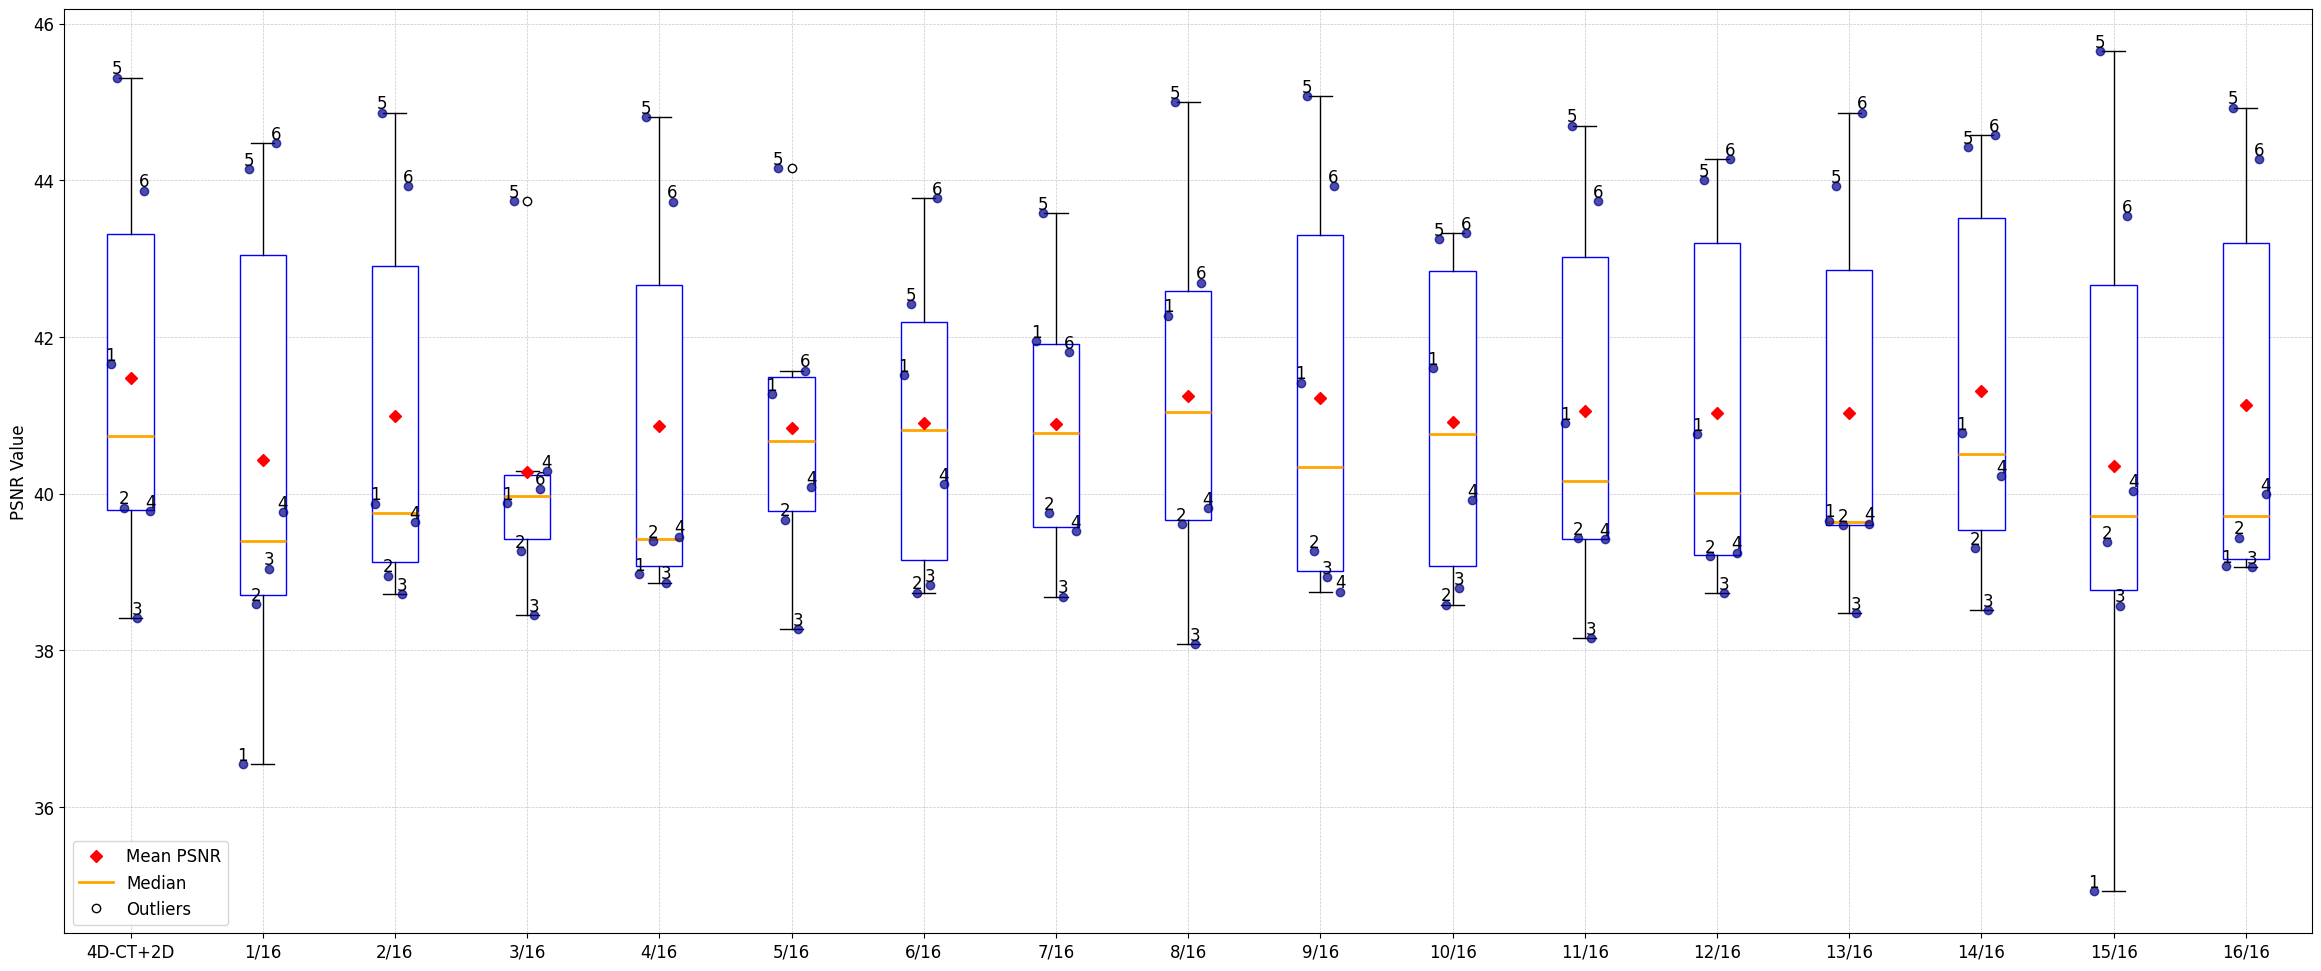

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# First we create a DataFrame from the data provided in the image.
data = {
    # PSNR
    '4D-CT+2D': [41.6507, 39.8204, 38.4106, 39.7801, 45.3116, 43.8686], # epoch 200 
    '1/16': [36.5461, 38.5904, 39.0403, 39.7596, 44.1395, 44.4725],
    '2/16': [39.8725, 38.9533, 38.7137, 39.6369, 44.8643, 43.9245],
    '3/16': [39.8819, 39.2663, 38.4511, 40.2869, 43.736, 40.0646],
    '4/16': [38.9712, 39.3879, 38.8611, 39.4507, 44.8036, 43.7277],
    '5/16': [41.2726, 39.6688, 38.2672, 40.0808, 44.1522, 41.5687],
    '6/16': [41.5079, 38.7348, 38.8275, 40.1185, 42.4179, 43.775],
    '7/16': [41.9506, 39.7538, 38.6822, 39.5156, 43.5851, 41.805],
    '8/16': [42.2738, 39.6123, 38.0771, 39.8158, 44.9956, 42.6947],
    '9/16': [41.4174, 39.2604, 38.9302, 38.7492, 45.0719, 43.9246],
    '10/16': [41.6004, 38.5803, 38.7882, 39.9139, 43.249, 43.3251],
    '11/16': [40.8988, 39.4315, 38.1523, 39.4208, 44.6979, 43.7353],
    '12/16': [40.7584, 39.1997, 38.7261, 39.2454, 44.0062, 44.2663],
    '13/16': [39.6547, 39.5968, 38.4764, 39.6155, 43.9277, 44.8648],
    '14/16': [40.7762, 39.2998, 38.516, 40.2263, 44.4276, 44.5803],
    '15/16': [34.9214, 39.3793, 38.5694, 40.0366, 45.6478, 43.5431],
    '16/16': [39.0735, 39.4367, 39.0594, 39.9949, 44.9266, 44.2679],
    # '4D-CT+2D': [41.6507, 39.8204, 38.4106, 39.7801, 45.3116, 43.8686] # epoch 200 
}
df = pd.DataFrame(data)

# plt.figure(figsize=(27, 10))
plt.figure(figsize=(29, 12))
plt.rcParams.update({'font.size': 12})

boxprops = dict(linestyle='-', linewidth=1, color='blue')
meanpointprops = dict(marker='D', markeredgecolor='red', markerfacecolor='red', markersize=6)
flierprops = dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=6)

boxplot_elements = plt.boxplot([df[col] for col in df.columns],
                               notch=False, widths=0.35, patch_artist=True, showmeans=True,
                               meanprops=meanpointprops, medianprops=dict(color="orange", linewidth=2),
                               boxprops=boxprops, flierprops=flierprops)

for patch in boxplot_elements['boxes']:
    patch.set_facecolor('white')

# # 在盒图上显示每个点
# colors = ['darkred', 'darkblue', 'darkgreen', 'goldenrod', 'purple']  # 不同组使用不同颜色
# for i, col in enumerate(df.columns):
#     y = df[col]
#     x = np.linspace(i+1-0.1, i+1+0.1, num=len(y))  # 使用线性空间为每个数据点生成固定偏移
#     plt.scatter(x, y, alpha=0.7, color=colors[i])

# 使用固定的偏移量，确保每个点都可见
offsets = np.array([-0.15, -0.05, 0.05, 0.15, -0.1, 0.1])  # 为六个数据点定义偏移量
patient_ids = np.arange(1, 7)  # 假设有6个患者编号从1到6
# colors = ['darkred', 'darkblue', 'darkgreen', 'goldenrod', 'purple']
for i, col in enumerate(df.columns):
    y = df[col]
    x = i + 1 + offsets[:len(y)]  # 使用固定的偏移量
    plt.scatter(x, y, alpha=0.7, color='darkblue',zorder=3)
    for xi, yi, patient_id in zip(x, y, patient_ids):
        plt.text(xi, yi, f'{patient_id}', color='black', fontsize=12, ha='center', va= 'bottom')

plt.xticks(range(1, len(df.columns)+1), df.columns)
plt.ylabel('PSNR Value')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.plot([], [], 'D', color='red', label='Mean PSNR')
plt.plot([], [], color='orange', label='Median', linewidth=2)
plt.plot([], [], 'o', markerfacecolor='white', markeredgecolor='black', label='Outliers', markersize=6)
plt.legend()
# Set the y-axis to start from 0
# plt.ylim(0.8,1)
plt.show()

### *16分Mean_STD计算

In [1]:
import numpy as np
import pandas as pd
# import ace_tools as tools

# SSIM
data = {
    '4D-CT+2D': [0.9536, 0.9064, 0.9586, 0.959, 0.9767, 0.9736], # epoch 200 
    '1/16': [0.9144, 0.8932, 0.9622, 0.9584, 0.9743, 0.975],
    '2/16': [0.9415, 0.8993, 0.9587, 0.9574, 0.9759, 0.973],
    '3/16': [0.9473, 0.9011, 0.9573, 0.9615, 0.9709, 0.9581],
    '4/16': [0.9464, 0.9031, 0.9589, 0.957, 0.9781, 0.9746],
    '5/16': [0.9507, 0.9002, 0.9553, 0.9602, 0.9742, 0.9691],
    '6/16': [0.951, 0.8915, 0.9597, 0.9617, 0.9684, 0.9727],
    '7/16': [0.9528, 0.9047, 0.959, 0.9573, 0.9696, 0.9646],
    '8/16': [0.9555, 0.903, 0.955, 0.9593, 0.9755, 0.9709],
    '9/16': [0.9521, 0.8993, 0.9614, 0.9516, 0.9769, 0.974],
    '10/16': [0.9528, 0.8918, 0.9598, 0.9589, 0.9717, 0.9704],
    '11/16': [0.9473, 0.9018, 0.9549, 0.9563, 0.9741, 0.9743],
    '12/16': [0.9449, 0.8995, 0.9588, 0.954, 0.9737, 0.9753],
    '13/16': [0.9414, 0.9035, 0.9576, 0.9583, 0.9719, 0.9758],
    '14/16': [0.9472, 0.9002, 0.9573, 0.9625, 0.9742, 0.9753],
    '15/16': [0.8861, 0.9005, 0.9598, 0.9608, 0.9772, 0.9725],
    '16/16': [0.9385, 0.9036, 0.9615, 0.9602, 0.9757, 0.974]
}

# Convert the dictionary to a DataFrame for easier computation
df = pd.DataFrame(data)

# Calculate the mean and standard deviation for each column
mean_values = df.mean()
std_values = df.std()

# tools.display_dataframe_to_user(name="Mean and Standard Deviation Data", dataframe=pd.DataFrame({'Mean': mean_values, 'STD': std_values}))